<a href="https://colab.research.google.com/github/rwalia2405/CIFAR10/blob/master/CIFAR10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision 
import torchvision.transforms as transforms

In [83]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [0]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

loading testing and training data set

In [85]:
trainset = torchvision.datasets.CIFAR10(root = './data',train=True,transform=transform,download=True)
testset = torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,shuffle=True,batch_size=4,num_workers=2)
testloader = torch.utils.data.DataLoader(testset,shuffle=False,num_workers=2,batch_size=4)
classes=('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 
	'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


defining function to visualise the images

In [0]:
import numpy as np
import matplotlib.pyplot as plt
def imshow(img):
  img = img.cpu()
  img = img/2+0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

visualizing the data

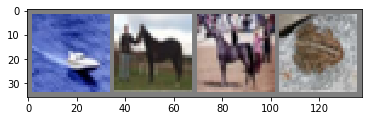

 ship horse horse  frog


In [87]:
dataiter = iter(trainloader)
images,labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' %classes[labels[j]] for j in range(4)))


checking the size of out input image

In [88]:
images[0].shape

torch.Size([3, 32, 32])

defining our network

In [0]:
import torch.nn as nn
import torch.nn.functional as F 

class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1 = nn.Conv2d(3,6,3,padding = 1)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,3,padding=1)
    self.conv3 = nn.Conv2d(16,32,3,padding=1)
    self.fc1 = nn.Linear(32*4*4,512)
    self.fc2 = nn.Linear(512,84)
    self.fc3 = nn.Linear(84,10)
    self.dropout = nn.Dropout(p=0.2)

  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))
    x = x.view(-1,32*4*4)
    x = F.relu(self.fc1(x))
  #  x = self.dropout(x)
    x = F.relu(self.fc2(x))
 #   x = self.dropout(x)
    x = self.fc3(x)
    return x  

initilizing out network

In [0]:
net = Net().to(device)

defining loss function and optimizer

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

training out network

In [100]:
for epoch in range(5):
	running_loss=0.0
	for i,data in enumerate(trainloader,0):
		inputs,lables=data
		inputs = inputs.to(device)
		lables = lables.to(device)
		optimizer.zero_grad()
		outputs=net(inputs)
		loss=criterion(outputs,lables)
		loss.backward()
		optimizer.step()
		running_loss+=loss.item()
		if i%2000==1999:
			print('[%d, %5d] loss: %3f' %(epoch + 1, i+1,running_loss/2000))
			running_loss=0.0
print('Finished Training')

[1,  2000] loss: 1.106697
[1,  4000] loss: 1.086700
[1,  6000] loss: 1.070552
[1,  8000] loss: 1.059115
[1, 10000] loss: 1.070686
[1, 12000] loss: 1.044809
[2,  2000] loss: 0.929253
[2,  4000] loss: 0.942635
[2,  6000] loss: 0.944038
[2,  8000] loss: 0.949263
[2, 10000] loss: 0.939995
[2, 12000] loss: 0.909997
[3,  2000] loss: 0.836867
[3,  4000] loss: 0.824367
[3,  6000] loss: 0.838791
[3,  8000] loss: 0.836457
[3, 10000] loss: 0.842469
[3, 12000] loss: 0.835705
[4,  2000] loss: 0.708599
[4,  4000] loss: 0.724714
[4,  6000] loss: 0.753846
[4,  8000] loss: 0.757928
[4, 10000] loss: 0.771667
[4, 12000] loss: 0.748911
[5,  2000] loss: 0.619418
[5,  4000] loss: 0.639285
[5,  6000] loss: 0.680843
[5,  8000] loss: 0.661819
[5, 10000] loss: 0.692895
[5, 12000] loss: 0.701135
Finished Training


lets test our model


In [101]:
net.eval()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

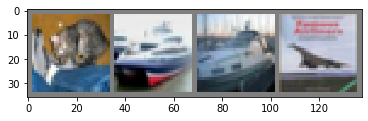

GroundTruth :    cat  ship  ship plane
Predicted:    cat  ship plane plane


In [102]:
dataiter = iter(testloader)
images,labels = dataiter.next()
images=images.to(device)
labels=labels.to(device)  
imshow(torchvision.utils.make_grid(images))
print('GroundTruth : ',' '.join('%5s' %classes[labels[j]] for j in range(4)))

with torch.no_grad():
  output = net(images)
  _,pred = torch.max(output,1)
  print('Predicted: ',' '.join('%5s' %classes[pred[j]] for  j in range(4)))

lets test on whole test dataset and
calculate accuracy

In [103]:
correct=0
total=0
with torch.no_grad():
  for (images,labels) in testloader:
    images = images.to(device)
    labels = labels.to(device)
    output = net(images)
    _,pred = torch.max(output.data,1)
    total += labels.size(0)
    correct += (pred==labels).sum().item()

print('Accuracy of our model on 10000 test images : %d %%' %(100*correct/total))


Accuracy of our model on 10000 test images : 69 %
